##Iris의 세 가지 품종, 분류해볼 수 있겠어요?

데이터셋
<br/>load_digits : 손글씨 분류
<br/>load_wine : 와인 분류
<br/>load_breast_cancer : 유방암 여부 진단



개발 환경
<br/>데이터 정보
<br/>데이터 탐색
<br/>데이터 분리

모델 학습
<br/>Decision Tree
<br/>Random Forest
<br/>SVC
<br/>SGD Classifier
<br/>Logistic Regression

모델 평가
<br/>결론
<br/>참고문헌

#개발 환경

In [ ]:
import pandas as pd                                   
import numpy as np  
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt  
%matplotlib inline                                              

pandas는 데이터를 구조화된 형식으로 가공 및 분석할 수 있도록 자료구조를 제공하는 패키지이다.

matplotlib은 데이터를 시각화한다.

numpy는 수치 행렬을 계산한다.

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score            
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import RandomForestClassifier  
from sklearn import svm                              
from sklearn.linear_model import SGDClassifier       
from sklearn.linear_model import LogisticRegression   

sklearn.model_selection은 데이터를 훈련 데이터와 시험 데이터로 분리한다.

sklearn.metrics은 분류 결과값을 class별로 출력하고 오차행렬을 시각화한다.
<br/>또한 정확도를 측정한다.

sklearn은 Decision Tree, Random Forest, Support Vector Classifier(SVC), SGD Clssifier, Logistic Regression을 한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'sklearn=']
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)
        library_version.append('    ')

f.close()

import sys
print(sys.version)
print()

for i in range(0, len(library_version) - 1, 6):
  print(str(library_version[i : i+6]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='') 
  if i % 6 == 0:
    print()

for i in range(len(library_version) - 1):
  if (i-1) % 6 == 0 and i == len(library_version) - 6:
    print(str(library_version[-1]).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

matplotlib==3.2.2      numpy==1.21.6      pandas==1.3.5     
sklearn==0.0      sklearn-pandas==1.8.0     


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#load_digits : 손글씨 분류

##데이터 정보

[sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

##데이터 탐색

In [ ]:
from sklearn.datasets import load_digits             
digits = load_digits()                                                                                                       

<Figure size 720x576 with 0 Axes>

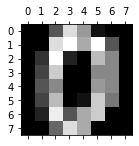

In [ ]:
plt.gray()
matfig = plt.figure(figsize=(2,2))
ax = plt.matshow(digits.images[0], fignum=matfig.number)
plt.show() 

손글씨 데이터 행렬을 시각화 도구 matplotlip을 이용해 나타낼 수 있다. 

In [ ]:
dir(digits)                                         

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.keys() 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

데이터셋 digits에는 data, target, frame, feature_names, target_names, images, DESCR까지
<br/>총 7개의 정보가 담겨져있다.

In [ ]:
digits_data = digits.data
print(digits_data.shape) 

(1797, 64)


총 1797개의 데이터가 각각 64개의 정보를 담고 있다.

In [ ]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

0번 index에 위치한 데이터의 정보이다.

In [ ]:
digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

digits 데이터의 타겟정보
<br/>타겟은 주어진 정답을 의미한다.
<br/>총 1797개의 데이터가 0부터 9까지 정수 한 자릿수로 구성됐다.

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

0부터 9까지 손글씨 이미지의 요소가 담겨있다.

In [ ]:
digits_feature = digits.feature_names
digits_feature

feature은 데이터의 속성으로 64개를 가지고 있다.

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

인스턴스. 속성. 속성에 대한 정보. 결측치 개수. 데이터셋 제작자와 제작 날짜 등을 알아볼 수 있다.

In [ ]:
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)  
digits_df['label'] = digits.target                                       
digits_df                                                                

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


정답 데이터 label 컬럼을 추가했다.

##데이터 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits_data,  
                                                    digits_label,    
                                                    test_size=0.2,   
                                                    random_state=1)  

print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))

x_train 개수:  1437 , x_test 개수:  360


digits_data은 특징 데이터, digits_label은 정답 데이터로 구성하여
<br/>random state으로 데이터를 무작위로 정렬하고
<br/>전체의 20%를 시험 데이터로 사용한다.

##모델 학습

###Decision Tree


In [ ]:
decision_tree = DecisionTreeClassifier(random_state=15)   
decision_tree.fit(x_train, y_train)    
y_pred = decision_tree.predict(x_test)                       

In [ ]:
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 2,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 4, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 9, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 5, 3, 4, 2, 7, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 5, 2, 7, 0, 8, 1, 7, 4, 2, 9, 8, 2, 3, 9, 0, 5, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 1, 3, 5, 4, 4, 7, 6, 2, 6, 6, 1, 9, 5,
       6, 9, 8, 3, 7, 1, 8, 5, 9, 4, 4, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 5, 0, 6, 0, 6, 5, 0, 9, 9, 5, 5, 2,
       3, 2, 9, 0, 7, 6, 2, 9, 3, 5, 8, 4, 6, 9, 3, 7, 4, 4, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 5, 9, 9, 3, 4, 9, 5, 6, 8, 0, 4, 5, 4, 8, 2, 3,
       5, 3, 0, 8, 7, 7, 0, 3, 3, 7, 6, 3, 2, 3, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 9, 1, 5, 3, 4, 0, 6, 4, 8, 5, 3, 6, 2, 1, 4,
       0, 4, 4, 8, 7, 9, 3, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 8, 6, 4, 2, 8,
       5, 0, 9, 6, 0, 1, 8, 3, 0, 5, 5, 6, 2, 0, 5,

In [ ]:
y_test

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

y_pred와 y_test의 결과를 비교해보니 비슷하게 나왔다

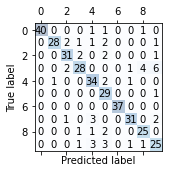

In [ ]:
digits_decisiontree_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(digits_decisiontree_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(digits_decisiontree_confmat.shape[0]):
  for j in range(digits_decisiontree_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=digits_decisiontree_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Decision Tree 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

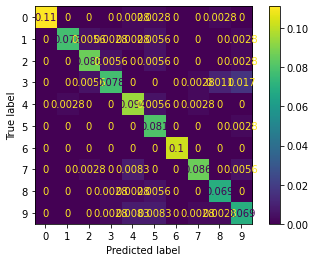

In [ ]:
plot_confusion_matrix(decision_tree, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.97      0.80      0.88        35
           2       0.86      0.86      0.86        36
           3       0.85      0.68      0.76        41
           4       0.79      0.89      0.84        38
           5       0.71      0.97      0.82        30
           6       1.00      1.00      1.00        37
           7       0.91      0.84      0.87        37
           8       0.81      0.86      0.83        29
           9       0.69      0.74      0.71        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.85       360
weighted avg       0.87      0.86      0.86       360



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.86
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.86

In [ ]:
digits_decisiontree_report = classification_report(y_test, y_pred, output_dict=True)
digits_decisiontree_report = pd.DataFrame(digits_decisiontree_report).transpose()   
digits_decisiontree_accuracy = digits_decisiontree_report['f1-score'][-3:-2][0]
print("accuracy : ", digits_decisiontree_accuracy)

accuracy :  0.8555555555555555


 Decision Tree 모델 성능 'accuracy'는 85.56%이다.
 <br/>Decision Tree 모델의 성능을 변수로 저장한다.

###Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state=32)       
random_forest.fit(x_train, y_train)                           
y_pred = random_forest.predict(x_test)    

In [ ]:
y_pred     

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 4, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [ ]:
y_test        

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

정답지와 예측치를 비교한다.

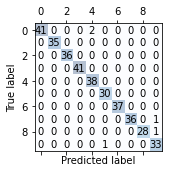

In [ ]:
digits_random_forest_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(digits_random_forest_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(digits_random_forest_confmat.shape[0]):
  for j in range(digits_random_forest_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=digits_random_forest_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Random Forest 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

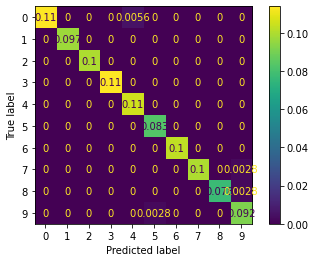

In [ ]:
plot_confusion_matrix(random_forest, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.97
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.97

In [ ]:
digits_randomforest_report = classification_report(y_test, y_pred, output_dict=True)
digits_randomforest_report = pd.DataFrame(digits_randomforest_report).transpose()  
digits_randomforest_accuracy = digits_randomforest_report['f1-score'][-3:-2][0]
print("accuracy : ", digits_randomforest_accuracy)

accuracy :  0.9861111111111112


Randomforest 모델의 성능 'accuracy'는 98.61%이다.
<br/>Randomforest 모델의 성능을 변수로 저장한다.


###Support Vector Classifier(SVC)

In [ ]:
svc_model = svm.SVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

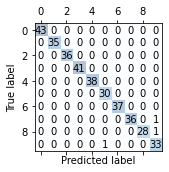

In [ ]:
digits_svc_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(digits_svc_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(digits_svc_confmat.shape[0]):
  for j in range(digits_svc_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=digits_svc_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SVC 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

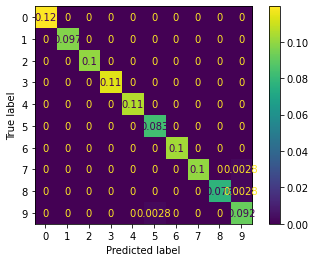

In [ ]:
plot_confusion_matrix(svc_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.99
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.99

In [ ]:
digits_svc_report = classification_report(y_test, y_pred, output_dict=True)
digits_svc_report = pd.DataFrame(digits_svc_report).transpose()  
digits_svc_accuracy = digits_svc_report['f1-score'][-3:-2][0]
print("accuracy : ", digits_svc_accuracy)

accuracy :  0.9916666666666667


SVC 모델의 성능 'accuracy'는 99.17%이다.
<br/>SVC 모델의 성능을 변수로 저장한다.

###SGD Classifier


In [ ]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

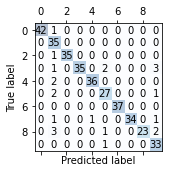

In [ ]:
digits_sgd_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(digits_sgd_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(digits_sgd_confmat.shape[0]):
  for j in range(digits_sgd_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=digits_sgd_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SGD 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

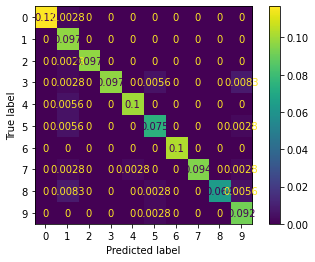

In [ ]:
plot_confusion_matrix(sgd_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.76      1.00      0.86        35
           2       1.00      0.97      0.99        36
           3       1.00      0.85      0.92        41
           4       0.97      0.95      0.96        38
           5       0.87      0.90      0.89        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       1.00      0.79      0.88        29
           9       0.82      0.97      0.89        34

    accuracy                           0.94       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.95      0.94      0.94       360



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.94
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.94

In [ ]:
digits_sgd_report = classification_report(y_test, y_pred, output_dict=True)
digits_sgd_report = pd.DataFrame(digits_sgd_report).transpose()  
digits_sgd_accuracy = digits_sgd_report['f1-score'][-3:-2][0]
print("accuracy : ", digits_sgd_accuracy)

accuracy :  0.9361111111111111


SGD 모델의 성능 'accuracy'는 93.61%이다.
<br/>SGD 모델의 성능을 변수로 저장한다.

###Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

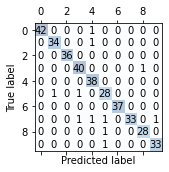

In [ ]:
digits_logistic_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(digits_logistic_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(digits_logistic_confmat.shape[0]):
  for j in range(digits_logistic_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=digits_logistic_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Logistic Regression 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

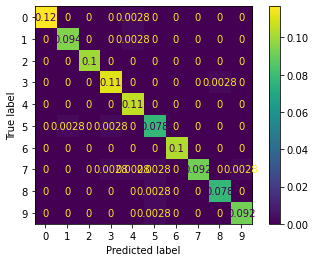

In [ ]:
plot_confusion_matrix(logistic_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.97
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.97

In [ ]:
digits_logistic_report = classification_report(y_test, y_pred, output_dict=True)
digits_logistic_report = pd.DataFrame(digits_logistic_report).transpose()   
digits_logistic_accuracy = digits_logistic_report['f1-score'][-3:-2][0]  
print("accuracy : ", digits_logistic_accuracy) 

accuracy :  0.9694444444444444


Logistic Regression 모델의 성능 'accuracy'는 96.94%이다.
<br/>Logistic Regression 모델의 성능을 변수로 저장한다.

##모델 평가

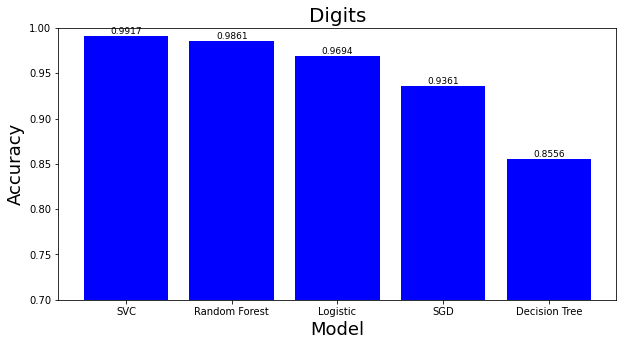

In [ ]:
digits_model_comparison = [round(digits_decisiontree_accuracy, 4)
,round(digits_randomforest_accuracy, 4), round(digits_svc_accuracy, 4)
,round(digits_sgd_accuracy, 4), round(digits_logistic_accuracy, 4)]

digits_model_name = ['Decision Tree','Random Forest','SVC','SGD', 'Logistic']   


digits_df = pd.DataFrame({"Model": digits_model_name,
                  "Accuracy":digits_model_comparison})
digits_df_sorted= digits_df.sort_values('Accuracy',ascending=False)


plt.figure(figsize=(10, 5))                                                 
bar_width = 0.1                                                                 

plt.bar('Model', 'Accuracy',data=digits_df_sorted, color = 'blue')       


for i, v in enumerate(digits_model_name):
    plt.text(v, digits_model_comparison[i],digits_model_comparison[i],      
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')  

plt.ylim([0.7, 1])   

plt.title('Digits', fontsize=20)     
plt.xlabel('Model', fontsize=18)     
plt.ylabel('Accuracy', fontsize=18)  

plt.show()           

SVC > Random Forest > Logistic > SGD > Decision Tree 순으로 성능이 높다.
<br/>따라서 digits 데이터셋에서는 SVC 모델 성능이 탁월하다.

#load_wine : 와인 분류

##데이터 정보

[sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=load_wine#sklearn.datasets.load_wine)

##데이터 탐색

In [ ]:
from sklearn.datasets import load_wine            
wine = load_wine()          

In [ ]:
dir(wine)     

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

데이터셋 wine에는 data, target, frame, feature_names, target_names, DESCR까지
<br/>총 6개의 정보가 담겨져있다.

In [ ]:
wine_data = wine.data
print(wine_data.shape) 

(178, 13)


총 178개의 데이터가 각각 13개의 정보를 담고 있다.

In [ ]:
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

0번 index에 위치한 데이터의 정보이다.

In [ ]:
wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

wine 데이터의 타겟정보
<br/>타겟은 주어진 정답을 의미한다.
<br/>총 178개의 데이터가 0부터 2까지 정수 한 자릿수로 구성됐다.

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

'class_0', 'class_1', 'class_2'으로 wine의 요소가 담겨있다.

In [ ]:
wine_feature = wine.feature_names
wine_feature

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

feature은 데이터의 속성으로 13개를 가지고 있다.

In [ ]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

인스턴스. 속성. 속성에 대한 정보. 결측치 개수. 데이터셋 제작자와 제작 날짜 등을 알아볼 수 있다.

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)  
wine_df['label'] = wine.target                                        
wine_df                                                                  

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


정답 데이터 label 컬럼을 추가했다.

##데이터 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine_data,  
                                                    wine_label,    
                                                    test_size=0.2,   
                                                    random_state=1)  

print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))

x_train 개수:  142 , x_test 개수:  36


digits_data은 특징 데이터, digits_label은 정답 데이터로 구성하여
<br/>random state으로 데이터를 무작위로 정렬하고
<br/>전체의 20%를 시험 데이터로 사용한다.

##모델 학습

###Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=15)  
decision_tree.fit(x_train, y_train) 
y_pred = decision_tree.predict(x_test)                        

In [ ]:
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1])

In [ ]:
y_test

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1])

y_pred와 y_test의 결과를 비교해보니 비슷하게 나왔다

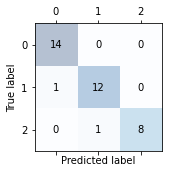

In [ ]:
wine_decisiontree_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_decisiontree_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_decisiontree_confmat.shape[0]):
  for j in range(wine_decisiontree_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_decisiontree_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Decision Tree 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

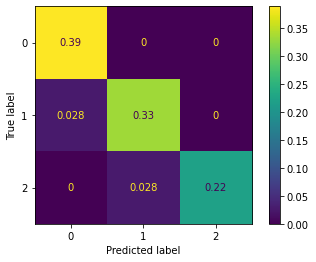

In [ ]:
plot_confusion_matrix(decision_tree, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.95
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.94

In [ ]:
wine_decisiontree_report = classification_report(y_test, y_pred, output_dict=True)
wine_decisiontree_report = pd.DataFrame(wine_decisiontree_report).transpose()   
wine_decisiontree_accuracy = wine_decisiontree_report['f1-score'][-3:-2][0] 
print("accuracy : ", wine_decisiontree_accuracy) 

accuracy :  0.9444444444444444


Decision Tree 모델 성능 'accuracy'는 94.44%이다.
 <br/>Decision Tree 모델의 성능을 변수로 저장한다.

###Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state=32)       
random_forest.fit(x_train, y_train)                          
y_pred = random_forest.predict(x_test)   

In [ ]:
y_pred         

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1])

In [ ]:
y_test        

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2])

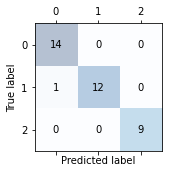

In [ ]:
wine_random_forest_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_random_forest_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_random_forest_confmat.shape[0]):
  for j in range(wine_random_forest_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_random_forest_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Random Forest 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

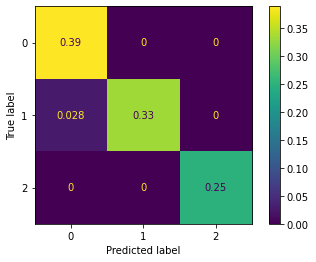

In [ ]:
plot_confusion_matrix(random_forest, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

Random Forest 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.97
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.97

In [ ]:
wine_randomforest_report = classification_report(y_test, y_pred, output_dict=True)
wine_randomforest_report = pd.DataFrame(wine_randomforest_report).transpose()   
wine_randomforest_accuracy = wine_randomforest_report['f1-score'][-3:-2][0]
print("accuracy : ", wine_randomforest_accuracy) 

accuracy :  0.9722222222222222


Randomforest 모델의 성능 'accuracy'는 97.22%이다.
<br/>Randomforest 모델의 성능을 변수로 저장한다.


###Support Vector Classifier(SVC)

In [ ]:
svc_model = svm.SVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

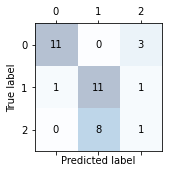

In [ ]:
wine_svc_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_svc_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_svc_confmat.shape[0]):
  for j in range(wine_svc_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_svc_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SVC 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

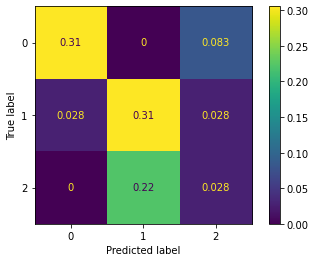

In [ ]:
plot_confusion_matrix(svc_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.58      0.85      0.69        13
           2       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.50
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.62

In [ ]:
wine_svc_report = classification_report(y_test, y_pred, output_dict=True)
wine_svc_report = pd.DataFrame(wine_svc_report).transpose()     
wine_svc_accuracy = wine_svc_report['f1-score'][-3:-2][0]
print("accuracy : ", wine_svc_accuracy) 

accuracy :  0.6388888888888888


SVC 모델의 성능 'accuracy'는 63.89%이다.
<br/>SVC 모델의 성능을 변수로 저장한다.

###SGD Classifier

In [ ]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

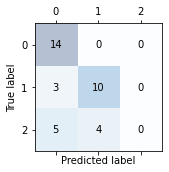

In [ ]:
wine_sgd_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_sgd_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_sgd_confmat.shape[0]):
  for j in range(wine_sgd_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_sgd_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SGD 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

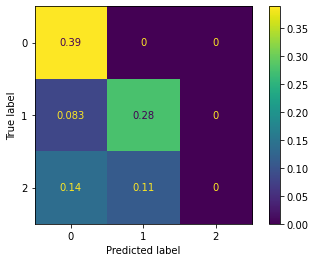

In [ ]:
plot_confusion_matrix(sgd_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        14
           1       0.71      0.77      0.74        13
           2       0.00      0.00      0.00         9

    accuracy                           0.67        36
   macro avg       0.45      0.59      0.51        36
weighted avg       0.51      0.67      0.57        36



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.71
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.65

In [ ]:
wine_sgd_report = classification_report(y_test, y_pred, output_dict=True)
wine_sgd_report = pd.DataFrame(wine_sgd_report).transpose()    
wine_sgd_accuracy = wine_sgd_report['f1-score'][-3:-2][0]    
print("accuracy : ", wine_sgd_accuracy) 

accuracy :  0.6666666666666666


SGD 모델의 성능 'accuracy'는 66.67%이다.
<br/>SGD 모델의 성능을 변수로 저장한다.

###Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

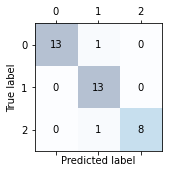

In [ ]:
wine_logistic_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_logistic_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_logistic_confmat.shape[0]):
  for j in range(wine_logistic_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_logistic_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Logistic Regression 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

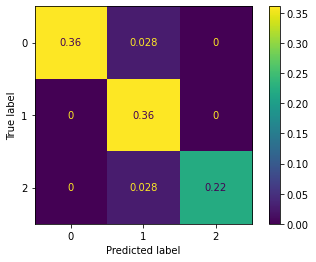

In [ ]:
plot_confusion_matrix(logistic_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.97
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.97

In [ ]:
wine_logistic_report = classification_report(y_test, y_pred, output_dict=True)
wine_logistic_report = pd.DataFrame(wine_logistic_report).transpose()     
wine_logistic_accuracy = wine_logistic_report['f1-score'][-3:-2][0]
print("accuracy : ", wine_logistic_accuracy) 

accuracy :  0.9444444444444444


Logistic Regression 모델의 성능 'accuracy'는 94.44%이다.
<br/>Logistic Regression 모델의 성능을 변수로 저장한다.

##모델 평가

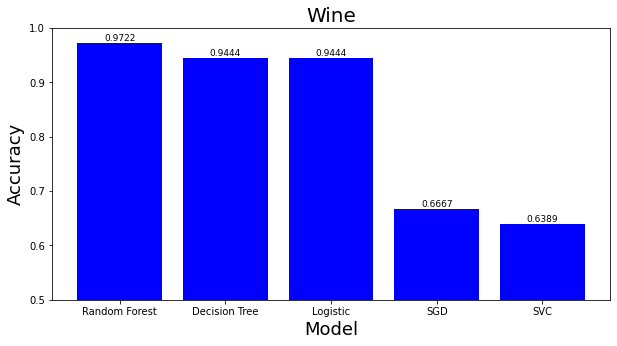

In [ ]:
wine_model_comparison = [round(wine_decisiontree_accuracy, 4)
,round(wine_randomforest_accuracy, 4), round(wine_svc_accuracy, 4)
,round(wine_sgd_accuracy, 4), round(wine_logistic_accuracy, 4)]

wine_model_name = ['Decision Tree','Random Forest','SVC','SGD', 'Logistic']  

wine_df = pd.DataFrame({"Model": wine_model_name,
                  "Accuracy":wine_model_comparison})
wine_df_sorted= wine_df.sort_values('Accuracy',ascending=False)


plt.figure(figsize=(10, 5))                                                  
bar_width = 0.1                                                                

plt.bar('Model', 'Accuracy',data=wine_df_sorted, color = 'blue')        

for i, v in enumerate(wine_model_name):
    plt.text(v, wine_model_comparison[i],wine_model_comparison[i],      
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')    

plt.ylim([0.5, 1])    
plt.title('Wine', fontsize=20)     
plt.xlabel('Model', fontsize=18)     
plt.ylabel('Accuracy', fontsize=18)  
plt.show()            

Random Forest > Decision Tree = Logistic  >  SGD > SVC 순으로 성능이 높다.
<br/>따라서 wine 데이터셋에서는 Random Forest 모델 성능이 탁월하다.

#load_breast_cancer : 유방암 여부 진단

##데이터 정보

[sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer#sklearn.datasets.load_breast_cancer)



##**데이터 탐색**

In [ ]:
from sklearn.datasets import load_breast_cancer             
breast_cancer = load_breast_cancer()        

In [ ]:
dir(breast_cancer)     

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
breast_cancer.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터셋 breast_cancer에는 data, target, frame, feature_names, target_names, filename, data_module, DESCR까지
<br/>총 8개의 정보가 담겨져있다.

In [ ]:
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


총 569개의 데이터가 각각 30개의 정보를 담고 있다.

In [ ]:
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

0번 index에 위치한 데이터의 정보이다.

In [ ]:
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

breast_cancer 데이터의 타겟정보
<br/>타겟은 주어진 정답을 의미한다.
<br/>총 569개의 데이터가 0과 1로 이진 분류됐다.

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

'malignant', 'benign'으로 breast_cancer의 요소가 담겨있다.

In [ ]:
breast_cancer_feature = breast_cancer.feature_names
breast_cancer_feature

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

feature은 데이터의 속성으로 30개를 가지고 있다.

In [ ]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

인스턴스. 속성. 속성에 대한 정보. 결측치 개수. 데이터셋 제작자와 제작 날짜 등을 알아볼 수 있다.

In [ ]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)  
breast_cancer_df['label'] = breast_cancer.target                                       
breast_cancer_df                                                                  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


정답 데이터 label 컬럼을 추가했다.

##데이터 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer_data,  
                                                    breast_cancer_label,   
                                                    test_size=0.2,   
                                                    random_state=1)  

print('x_train 개수: ', len(x_train),', x_test 개수: ', len(x_test))

x_train 개수:  455 , x_test 개수:  114


digits_data은 특징 데이터, digits_label은 정답 데이터로 구성하여
<br/>random state으로 데이터를 무작위로 정렬하고
<br/>전체의 20%를 시험 데이터로 사용한다.

##모델 학습

###Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=15)   
decision_tree.fit(x_train, y_train)                       

DecisionTreeClassifier(random_state=15)

In [ ]:
y_pred = decision_tree.predict(x_test)                   
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

y_pred와 y_test의 결과를 비교해보니 비슷하게 나왔다

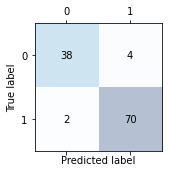

In [ ]:
breast_cancer_decisiontree_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(breast_cancer_decisiontree_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(breast_cancer_decisiontree_confmat.shape[0]):
  for j in range(breast_cancer_decisiontree_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=breast_cancer_decisiontree_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Decision Tree 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

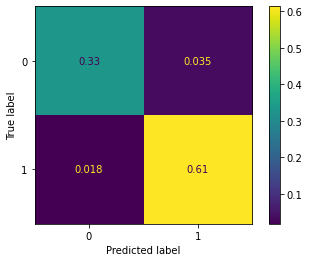

In [ ]:
plot_confusion_matrix(decision_tree, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.95
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.94

In [ ]:
breast_cancer_decisiontree_report = classification_report(y_test, y_pred, output_dict=True)
breast_cancer_decisiontree_report = pd.DataFrame(breast_cancer_decisiontree_report).transpose()   
breast_cancer_decisiontree_accuracy = breast_cancer_decisiontree_report['f1-score'][-3:-2][0]    
print("accuracy : ", breast_cancer_decisiontree_accuracy)          

accuracy :  0.9473684210526315


 Decision Tree 모델 성능 'accuracy'는 94.74%이다.
 <br/>Decision Tree 모델의 성능을 변수로 저장한다.

###Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state=32)       
random_forest.fit(x_train, y_train)                          
y_pred = random_forest.predict(x_test)                               

In [ ]:
y_pred  

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [ ]:
 y_test        

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

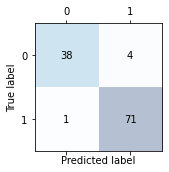

In [ ]:
breast_cancer_random_forest_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(breast_cancer_random_forest_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(breast_cancer_random_forest_confmat.shape[0]):
  for j in range(breast_cancer_random_forest_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=breast_cancer_random_forest_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Random Forest 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

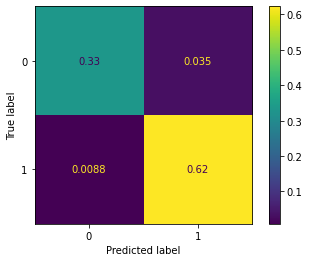

In [ ]:
plot_confusion_matrix(random_forest, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.94
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.92

In [ ]:
breast_cancer_randomforest_report = classification_report(y_test, y_pred, output_dict=True)
breast_cancer_randomforest_report = pd.DataFrame(breast_cancer_randomforest_report).transpose()  
breast_cancer_randomforest_accuracy = breast_cancer_randomforest_report['f1-score'][-3:-2][0]    
print("accuracy : ", breast_cancer_randomforest_accuracy)   

accuracy :  0.956140350877193


Randomforest 모델의 성능 'accuracy'는 95.61%이다.
<br/>Randomforest 모델의 성능을 변수로 저장한다.

###Support Vector Classifier(SVC)

In [ ]:
svc_model = svm.SVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

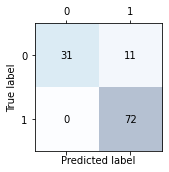

In [ ]:
breast_cancer_svc_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(breast_cancer_svc_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(breast_cancer_svc_confmat.shape[0]):
  for j in range(breast_cancer_svc_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=breast_cancer_svc_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SVC 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

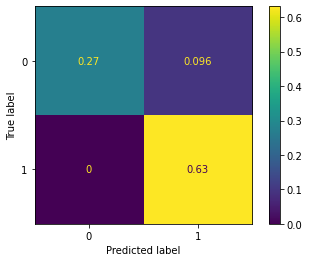

In [ ]:
plot_confusion_matrix(svc_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.92
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.86

In [ ]:
breast_cancer_svc_report = classification_report(y_test, y_pred, output_dict=True)
breast_cancer_svc_report = pd.DataFrame(breast_cancer_svc_report).transpose()     
breast_cancer_svc_accuracy = breast_cancer_svc_report['f1-score'][-3:-2][0]   
print("accuracy : ", breast_cancer_svc_accuracy)   

accuracy :  0.9035087719298246


SVC 모델의 성능 'accuracy'는 90.35%이다.
<br/>SVC 모델의 성능을 변수로 저장한다.

###SGD Classifier

In [ ]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)

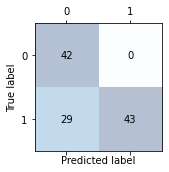

In [ ]:
wine_sgd_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_sgd_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_sgd_confmat.shape[0]):
  for j in range(wine_sgd_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_sgd_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SGD 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

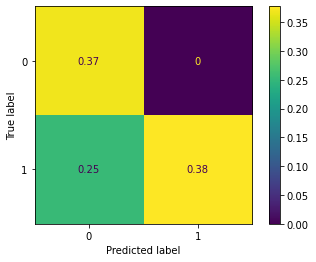

In [ ]:
plot_confusion_matrix(sgd_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        42
           1       1.00      0.60      0.75        72

    accuracy                           0.75       114
   macro avg       0.80      0.80      0.75       114
weighted avg       0.85      0.75      0.75       114



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.90
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.82

In [ ]:
breast_cancer_sgd_report = classification_report(y_test, y_pred, output_dict=True)
breast_cancer_sgd_report = pd.DataFrame(breast_cancer_sgd_report).transpose()    
breast_cancer_sgd_accuracy = breast_cancer_sgd_report['f1-score'][-3:-2][0]
print("accuracy : ", breast_cancer_sgd_accuracy) 

accuracy :  0.7456140350877193


SGD 모델의 성능 'accuracy'는 74.56%이다.
<br/>SGD 모델의 성능을 변수로 저장한다.

###Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

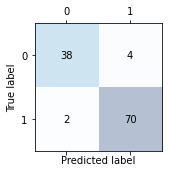

In [ ]:
wine_logistic_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(wine_logistic_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(wine_logistic_confmat.shape[0]):
  for j in range(wine_logistic_confmat.shape[1]):
    ax.text(x=j, y=i,
            s=wine_logistic_confmat[i, j],
            va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Logistic Regression 학습 알고리즘의 성능을 행렬로 펼쳐 놓은 오차 행렬

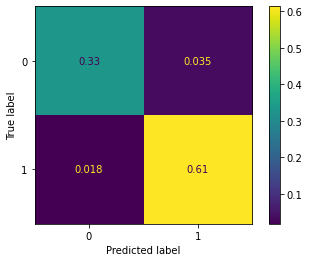

In [ ]:
plot_confusion_matrix(logistic_model, x_test, y_test, normalize='all')
plt.show()

normalize 매개변수를 사용하여 오차 행렬의 값을 정규화

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



예측값을 기준으로 한 정답인 예측값의 비율(Precision) 평균 = 0.95
<br/>실제값을 기준으로 한 정답인 예측값의 비율(Recall) 평균 = 0.92

In [ ]:
breast_cancer_logistic_report = classification_report(y_test, y_pred, output_dict=True)
breast_cancer_logistic_report = pd.DataFrame(breast_cancer_logistic_report).transpose()     
breast_cancer_logistic_accuracy = breast_cancer_logistic_report['f1-score'][-3:-2][0]       
print("accuracy : ", breast_cancer_logistic_accuracy) 

accuracy :  0.9473684210526315


Logistic Regression 모델의 성능 'accuracy'는 94.74%이다.
<br/>Logistic Regression 모델의 성능을 변수로 저장한다.

##모델 평가

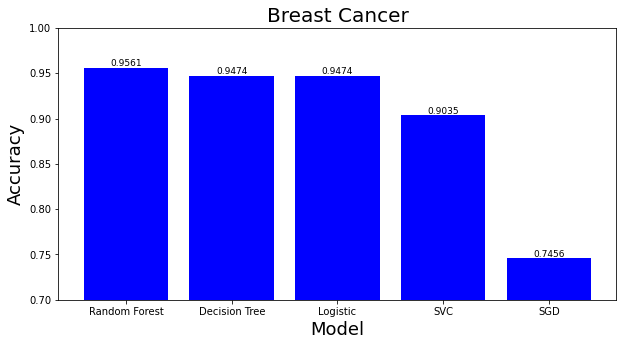

In [ ]:
breast_cancer_model_comparison = [round(breast_cancer_decisiontree_accuracy, 4)
,round(breast_cancer_randomforest_accuracy, 4), round(breast_cancer_svc_accuracy, 4)
,round(breast_cancer_sgd_accuracy, 4), round(breast_cancer_logistic_accuracy, 4)]


breast_cancer_model_name = ['Decision Tree','Random Forest','SVC','SGD', 'Logistic']  


breast_cancer_df = pd.DataFrame({"Model": breast_cancer_model_name,
                  "Accuracy":breast_cancer_model_comparison})
breast_cancer_df_sorted= breast_cancer_df.sort_values('Accuracy',ascending=False)


plt.figure(figsize=(10, 5))                                                  
bar_width = 0.1                                                                

plt.bar('Model', 'Accuracy',data=breast_cancer_df_sorted, color = 'blue')       


for i, v in enumerate(breast_cancer_model_name):
    plt.text(v, breast_cancer_model_comparison[i],breast_cancer_model_comparison[i],      
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')    

plt.ylim([0.7, 1])   
plt.title('Breast Cancer', fontsize=20)     
plt.xlabel('Model', fontsize=18)     
plt.ylabel('Accuracy', fontsize=18)  
plt.show()         


Random Forest > Decision Tree = Logistic > SVC > SGD 순으로 성능이 높다.
<br/>따라서 breast_cancer 데이터셋에서는 Random Forest 모델 성능이 탁월하다.

#결론


digits
<br/>SVC > Random Forest > Logistic > SGD > Decision Tree 순으로 성능이 높다.

wine
<br/>Random Forest > Decision Tree = Logistic  >  SGD > SVC 순으로 성능이 높다.

breast_cancer
<br/>Random Forest > Decision Tree = Logistic > SVC > SGD 순으로 성능이 높다.

데이터에 따라 맞는 분석모델이 다르다.
<br/>최적화된 분석 모델의 선택 과정은 어떻게 되는 것일까?
<br/>코딩 이전에 모델을 선택하는 것일까?
<br/>아니면 코딩 이후에 모델을 선택하는 것일까?
<br/>분석자의 도메인 지식으로 알고 있는 데이터의 특성에 따라 분석모델을 선택하는 것일까?
<br/>연구자의 사전 지식을 배제하고 컴퓨터의 분석 결과 수치값만을 고려하여 수학적으로 분석모델을 선택하는 것일까?

#참고문헌

**LMS**
<br/>[jeina7](https://github.com/jeina7)

<br/>**단행본**
<br/>세바스찬 라시카, 바히드 미자리리, 『머신 러닝 교과서 with 파이썬, 사이킷런, 텐서플로』, 박해선 옮긴이, 길벗, 2021
<br/>[오차 행렬](https://thebook.io/080223/ch06/05/01-01/)

<br/>**공식 사이트**
<br/>Sklearn
<br/>[load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
<br/>[load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=load_wine#sklearn.datasets.load_wine)
<br/>[load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer#sklearn.datasets.load_breast_cancer)

<br/>**웹사이트**
<br/>[Python matplotlib - 그래프에 값 표시 하기](https://pydole.tistory.com/entry/Python-matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84%EC%97%90-%EA%B0%92-%ED%91%9C%EC%8B%9C-%ED%95%98%EA%B8%B0)